In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
import numpy as np
from tensorflow.keras.datasets import cifar10

In [38]:
vgg16 = VGG16(weights = 'imagenet', input_shape = (32,32,3), include_top = False)

In [39]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [18]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 위에 있는 가중치값들은 손대지 말고 True 값들만 재학습시킨다.
for layer in vgg16.layers[:-4]:
    layer.trainable = False

In [20]:
for layer in vgg16.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_mean = np.mean(X_train, axis = (0, 1, 2)) 
X_std = np.std(X_train, axis = (0, 1, 2))

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [23]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)
model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_val, y_val), callbacks = [es])

Epoch 1/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.9165 - acc: 0.6797 - val_loss: 0.7599 - val_acc: 0.7399
Epoch 2/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.6285 - acc: 0.7778 - val_loss: 0.6684 - val_acc: 0.7703
Epoch 3/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.4845 - acc: 0.8272 - val_loss: 0.6783 - val_acc: 0.7737
Epoch 4/30
1094/1094 [==============================] - 13s 11ms/step - loss: 0.3522 - acc: 0.8747 - val_loss: 0.6873 - val_acc: 0.7773
Epoch 5/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.2405 - acc: 0.9136 - val_loss: 0.8749 - val_acc: 0.7581
Epoch 6/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.1710 - acc: 0.9389 - val_loss: 0.8697 - val_acc: 0.7693
Epoch 7/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.1143 - acc: 0.9600 - val_loss: 1.0359 - val_acc: 0.7721


In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0763 - acc: 0.7594


[1.0762615203857422, 0.7594000101089478]

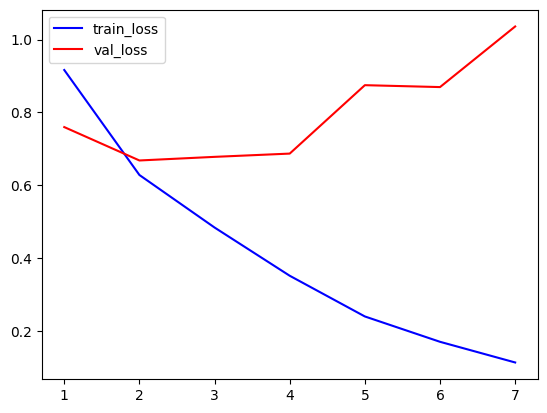

In [25]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, color = 'blue', label = 'train_loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, color = 'red', label = 'val_loss')
plt.legend()
plt.show()

In [29]:
model_v2 = Sequential()
model_v2.add(vgg16)
model_v2.add(Flatten())
model_v2.add(Dense(512, activation = 'relu'))
model_v2.add(Dense(256, activation = 'relu'))
model_v2.add(Dense(10, activation = 'softmax'))

model_v2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 15,111,242
Trainable params: 15,111,242
Non-trainable params: 0
_________________________________________________________________


In [30]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)
model_v2.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
history_v2 = model_v2.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_val, y_val), callbacks = [es])

Epoch 1/30
1094/1094 [==============================] - 25s 22ms/step - loss: 0.6687 - acc: 0.7713 - val_loss: 0.5954 - val_acc: 0.7977
Epoch 2/30
1094/1094 [==============================] - 23s 21ms/step - loss: 0.3974 - acc: 0.8613 - val_loss: 0.5460 - val_acc: 0.8134
Epoch 3/30
1094/1094 [==============================] - 24s 22ms/step - loss: 0.2743 - acc: 0.9057 - val_loss: 0.6133 - val_acc: 0.8067
Epoch 4/30
1094/1094 [==============================] - 24s 22ms/step - loss: 0.2006 - acc: 0.9300 - val_loss: 0.6964 - val_acc: 0.8035
Epoch 5/30
1094/1094 [==============================] - 24s 22ms/step - loss: 0.1579 - acc: 0.9465 - val_loss: 0.5742 - val_acc: 0.8369
Epoch 6/30
1094/1094 [==============================] - 24s 22ms/step - loss: 0.1251 - acc: 0.9568 - val_loss: 0.7026 - val_acc: 0.8075
Epoch 7/30
1094/1094 [==============================] - 24s 22ms/step - loss: 0.1058 - acc: 0.9647 - val_loss: 0.6158 - val_acc: 0.8394


In [31]:
model_v2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6637 - acc: 0.8352


[0.6637111306190491, 0.8352000117301941]

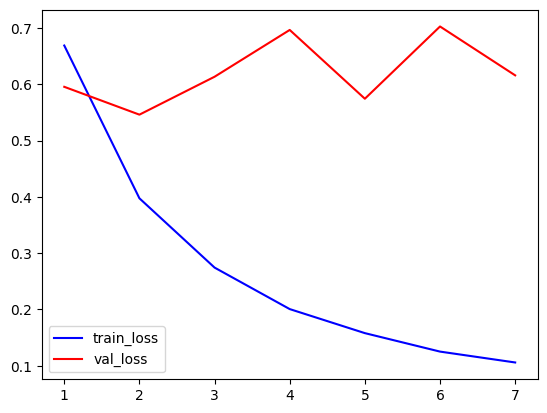

In [32]:
train_loss_v2 = history_v2.history['loss']
val_loss_v2 = history_v2.history['val_loss']

plt.plot(range(1, len(train_loss_v2) + 1), train_loss_v2, color = 'blue', label = 'train_loss')
plt.plot(range(1, len(val_loss_v2) + 1), val_loss_v2, color = 'red', label = 'val_loss')
plt.legend()
plt.show()

In [42]:
for layer in vgg16.layers[:-4]:
    layer.trainable = False

In [43]:
model_v3 = Sequential()
model_v3.add(vgg16)
model_v3.add(Flatten())
model_v3.add(Dense(256, activation = 'relu'))
model_v3.add(Dense(128, activation = 'relu'))
model_v3.add(Dense(10, activation = 'softmax'))

model_v3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 14,880,202
Trainable params: 7,244,938
Non-trainable params: 7,635,264
_________________________________________________________________


In [44]:
model_v3.compile(optimizer = Adam(1e-5), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
history_v3 = model_v3.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 14s 12ms/step - loss: 1.1488 - acc: 0.6057 - val_loss: 0.8623 - val_acc: 0.7043
Epoch 2/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.7768 - acc: 0.7307 - val_loss: 0.7641 - val_acc: 0.7347
Epoch 3/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.6650 - acc: 0.7711 - val_loss: 0.7376 - val_acc: 0.7425
Epoch 4/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.5865 - acc: 0.7988 - val_loss: 0.7114 - val_acc: 0.7511
Epoch 5/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.5175 - acc: 0.8218 - val_loss: 0.6808 - val_acc: 0.7669
Epoch 6/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.4590 - acc: 0.8452 - val_loss: 0.6676 - val_acc: 0.7677
Epoch 7/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.4039 - acc: 0.8667 - val_loss: 0.6690 - val_acc: 0.7693
Epoch 8/30
1094/1094 [==========================

KeyboardInterrupt: 

In [45]:
model_v3.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.8403 - acc: 0.7710


[0.8403467535972595, 0.7710000276565552]

In [4]:
vgg16 = VGG16(weights = 'imagenet', input_shape = (32,32,3), include_top = False)

for layer in vgg16.layers[:-8]:
    layer.trainable = False
    
model_v4 = Sequential()
model_v4.add(vgg16)
model_v4.add(Flatten())
model_v4.add(Dense(256, activation = 'relu'))
model_v4.add(Dense(10, activation = 'softmax'))

model_v4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 13,113,098
Non-trainable params: 1,735,488
_________________________________________________________________


In [6]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)
model_v4.compile(optimizer = Adam(3e-5), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
history_v4 = model_v4.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_val, y_val), callbacks = [es])

Epoch 1/30
1094/1094 [==============================] - 23s 17ms/step - loss: 0.8653 - acc: 0.6988 - val_loss: 0.6521 - val_acc: 0.7724
Epoch 2/30
1094/1094 [==============================] - 17s 15ms/step - loss: 0.5428 - acc: 0.8101 - val_loss: 0.6158 - val_acc: 0.7867
Epoch 3/30
1094/1094 [==============================] - 16s 14ms/step - loss: 0.3870 - acc: 0.8624 - val_loss: 0.6009 - val_acc: 0.7910
Epoch 4/30
1094/1094 [==============================] - 16s 15ms/step - loss: 0.2664 - acc: 0.9063 - val_loss: 0.6150 - val_acc: 0.8062
Epoch 5/30
1094/1094 [==============================] - 17s 15ms/step - loss: 0.1703 - acc: 0.9400 - val_loss: 0.6282 - val_acc: 0.8170
Epoch 6/30
1094/1094 [==============================] - 16s 15ms/step - loss: 0.1068 - acc: 0.9638 - val_loss: 0.6879 - val_acc: 0.8182
Epoch 7/30
1094/1094 [==============================] - 16s 15ms/step - loss: 0.0780 - acc: 0.9730 - val_loss: 0.7650 - val_acc: 0.8125
Epoch 8/30
1094/1094 [==========================

In [7]:
model_v4.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.8213 - acc: 0.8132


[0.8212916254997253, 0.8131999969482422]

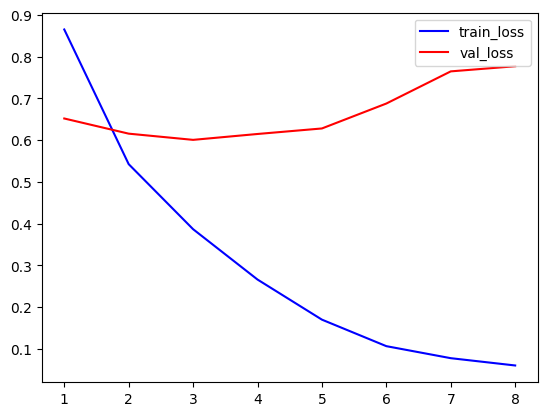

In [8]:
import matplotlib.pyplot as plt

train_loss_v4 = history_v4.history['loss']
val_loss_v4 = history_v4.history['val_loss']

plt.plot(range(1, len(train_loss_v4) + 1), train_loss_v4, color = 'blue', label = 'train_loss')
plt.plot(range(1, len(val_loss_v4) + 1), val_loss_v4, color = 'red', label = 'val_loss')
plt.legend()
plt.show()

In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_mean = np.mean(X_train, axis = (0, 1, 2)) 
X_std = np.std(X_train, axis = (0, 1, 2))

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [11]:
vgg16 = VGG16(weights = 'imagenet', input_shape = (32,32,3), include_top = False)

for layer in vgg16.layers[:-6]:
    layer.trainable = False
    
model_v5 = Sequential()
model_v5.add(vgg16)
model_v5.add(Flatten())
model_v5.add(Dense(256, activation = 'relu'))
model_v5.add(Dense(128, activation = 'relu'))
model_v5.add(Dense(10, activation = 'softmax'))

model_v5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,880,202
Trainable params: 9,604,746
Non-trainable params: 5,275,456
_________________________________________________________________


In [12]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)
model_v5.compile(optimizer = Adam(3e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
history_v5 = model_v5.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_val, y_val), callbacks = [es])

Epoch 1/30
1094/1094 [==============================] - 15s 13ms/step - loss: 0.9519 - acc: 0.6759 - val_loss: 0.7330 - val_acc: 0.7503
Epoch 2/30
1094/1094 [==============================] - 14s 12ms/step - loss: 0.6671 - acc: 0.7761 - val_loss: 0.7422 - val_acc: 0.7575
Epoch 3/30
1094/1094 [==============================] - 14s 12ms/step - loss: 0.5512 - acc: 0.8145 - val_loss: 0.6463 - val_acc: 0.7866
Epoch 4/30
1094/1094 [==============================] - 15s 13ms/step - loss: 0.4448 - acc: 0.8470 - val_loss: 0.7090 - val_acc: 0.7735
Epoch 5/30
1094/1094 [==============================] - 15s 14ms/step - loss: 0.3628 - acc: 0.8763 - val_loss: 0.6624 - val_acc: 0.8031
Epoch 6/30
1094/1094 [==============================] - 14s 12ms/step - loss: 0.2911 - acc: 0.9015 - val_loss: 0.8117 - val_acc: 0.7839
Epoch 7/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.2351 - acc: 0.9209 - val_loss: 0.7737 - val_acc: 0.7922
Epoch 8/30
1094/1094 [==========================

In [13]:
model_v5.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8369 - acc: 0.7862


[0.836876630783081, 0.7861999869346619]

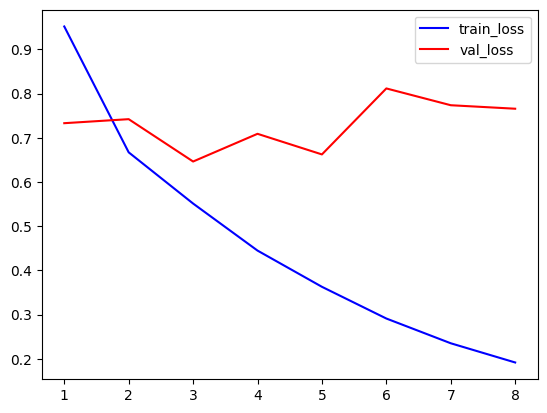

In [14]:
import matplotlib.pyplot as plt

train_loss_v5 = history_v5.history['loss']
val_loss_v5 = history_v5.history['val_loss']

plt.plot(range(1, len(train_loss_v5) + 1), train_loss_v5, color = 'blue', label = 'train_loss')
plt.plot(range(1, len(val_loss_v5) + 1), val_loss_v5, color = 'red', label = 'val_loss')
plt.legend()
plt.show()

In [18]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_mean = np.mean(X_train, axis = (0, 1, 2)) 
X_std = np.std(X_train, axis = (0, 1, 2))

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [19]:
vgg16 = VGG16(weights = 'imagenet', input_shape = (32,32,3), include_top = False)

for layer in vgg16.layers[:-3]:
    layer.trainable = False
    
model_v6 = Sequential()
model_v6.add(vgg16)
model_v6.add(Flatten())
model_v6.add(Dense(256, activation = 'relu'))
model_v6.add(Dense(128, activation = 'relu'))
model_v6.add(Dense(10, activation = 'softmax'))

model_v6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 14,880,202
Trainable params: 4,885,130
Non-trainable params: 9,995,072
_________________________________________________________________


In [20]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)
model_v6.compile(optimizer = Adam(1e-5), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
history_v6 = model_v6.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_val, y_val), callbacks = [es])

Epoch 1/30
1094/1094 [==============================] - 12s 10ms/step - loss: 1.2806 - acc: 0.5641 - val_loss: 0.9442 - val_acc: 0.6741
Epoch 2/30
1094/1094 [==============================] - 11s 10ms/step - loss: 0.8698 - acc: 0.6990 - val_loss: 0.8459 - val_acc: 0.7083
Epoch 3/30
1094/1094 [==============================] - 11s 10ms/step - loss: 0.7731 - acc: 0.7328 - val_loss: 0.8181 - val_acc: 0.7153
Epoch 4/30
1094/1094 [==============================] - 11s 10ms/step - loss: 0.7058 - acc: 0.7540 - val_loss: 0.7694 - val_acc: 0.7315
Epoch 5/30
1094/1094 [==============================] - 11s 10ms/step - loss: 0.6527 - acc: 0.7743 - val_loss: 0.7543 - val_acc: 0.7367
Epoch 6/30
1094/1094 [==============================] - 11s 10ms/step - loss: 0.6056 - acc: 0.7937 - val_loss: 0.7397 - val_acc: 0.7413
Epoch 7/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.5622 - acc: 0.8086 - val_loss: 0.7254 - val_acc: 0.7471
Epoch 8/30
1094/1094 [==========================

In [21]:
model_v6.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7614 - acc: 0.7555


[0.7613947987556458, 0.7555000185966492]

In [22]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_mean = np.mean(X_train, axis = (0, 1, 2)) 
X_std = np.std(X_train, axis = (0, 1, 2))

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [23]:
vgg16 = VGG16(weights = 'imagenet', input_shape = (32,32,3), include_top = False)

for layer in vgg16.layers[:-12]:
    layer.trainable = False
    
model_v7 = Sequential()
model_v7.add(vgg16)
model_v7.add(Flatten())
model_v7.add(Dense(256, activation = 'relu'))
model_v7.add(Dense(128, activation = 'relu'))
model_v7.add(Dense(10, activation = 'softmax'))

model_v7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 14,880,202
Trainable params: 14,620,042
Non-trainable params: 260,160
_________________________________________________________________


In [24]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)
model_v7.compile(optimizer = Adam(1e-5), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
history_v7 = model_v7.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_val, y_val), callbacks = [es])

Epoch 1/30
1094/1094 [==============================] - 20s 18ms/step - loss: 0.9868 - acc: 0.6564 - val_loss: 0.7153 - val_acc: 0.7546
Epoch 2/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.6093 - acc: 0.7893 - val_loss: 0.6098 - val_acc: 0.7887
Epoch 3/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.4887 - acc: 0.8307 - val_loss: 0.5778 - val_acc: 0.8001
Epoch 4/30
1094/1094 [==============================] - 20s 18ms/step - loss: 0.3935 - acc: 0.8650 - val_loss: 0.5496 - val_acc: 0.8092
Epoch 5/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.3165 - acc: 0.8896 - val_loss: 0.5165 - val_acc: 0.8254
Epoch 6/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.2527 - acc: 0.9137 - val_loss: 0.5547 - val_acc: 0.8211
Epoch 7/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.1908 - acc: 0.9355 - val_loss: 0.6184 - val_acc: 0.8184
Epoch 8/30
1094/1094 [==========================

In [25]:
model_v7.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.6990 - acc: 0.8255


[0.6990190744400024, 0.8255000114440918]

In [26]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_mean = np.mean(X_train, axis = (0, 1, 2)) 
X_std = np.std(X_train, axis = (0, 1, 2))

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [32]:
vgg16 = VGG16(weights = 'imagenet', input_shape = (32,32,3), include_top = False)
    
model_v8 = Sequential()
model_v8.add(vgg16)
model_v8.add(Flatten())
model_v8.add(Dense(256, activation = 'relu'))
model_v8.add(Dense(128, activation = 'relu'))
model_v8.add(Dense(10, activation = 'softmax'))

model_v8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 14,880,202
Trainable params: 14,880,202
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)
model_v8.compile(optimizer = Adam(1e-5), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
history_v8 = model_v8.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_val, y_val), callbacks = [es])

Epoch 1/30
1094/1094 [==============================] - 30s 27ms/step - loss: 0.9743 - acc: 0.6622 - val_loss: 0.7242 - val_acc: 0.7493
Epoch 2/30
1094/1094 [==============================] - 28s 26ms/step - loss: 0.6044 - acc: 0.7906 - val_loss: 0.6603 - val_acc: 0.7721
Epoch 3/30
1094/1094 [==============================] - 28s 26ms/step - loss: 0.4855 - acc: 0.8310 - val_loss: 0.5513 - val_acc: 0.8134
Epoch 4/30
1094/1094 [==============================] - 28s 26ms/step - loss: 0.3931 - acc: 0.8648 - val_loss: 0.5461 - val_acc: 0.8133
Epoch 5/30
1094/1094 [==============================] - 28s 26ms/step - loss: 0.3186 - acc: 0.8907 - val_loss: 0.5160 - val_acc: 0.8268
Epoch 6/30
1094/1094 [==============================] - 28s 26ms/step - loss: 0.2509 - acc: 0.9141 - val_loss: 0.5354 - val_acc: 0.8277
Epoch 7/30
1094/1094 [==============================] - 28s 26ms/step - loss: 0.1955 - acc: 0.9335 - val_loss: 0.5168 - val_acc: 0.8387
Epoch 8/30
1094/1094 [==========================

In [29]:
model_v8.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.6959 - acc: 0.8252


[0.6958824992179871, 0.8252000212669373]

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_mean = np.mean(X_train, axis = (0, 1, 2)) 
X_std = np.std(X_train, axis = (0, 1, 2))

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [3]:
vgg16 = VGG16(weights = None, input_shape = (32,32,3), include_top = False)
    
model_v9 = Sequential()
model_v9.add(vgg16)
model_v9.add(Flatten())
model_v9.add(Dense(256, activation = 'relu'))
model_v9.add(Dense(128, activation = 'relu'))
model_v9.add(Dense(10, activation = 'softmax'))

model_v9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,880,202
Trainable params: 14,880,202
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)
model_v9.compile(optimizer = Adam(1e-5), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
history_v9 = model_v9.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_val, y_val), callbacks = [es])

Epoch 1/30
1094/1094 [==============================] - 30s 24ms/step - loss: 1.9831 - acc: 0.2422 - val_loss: 1.8198 - val_acc: 0.2958
Epoch 2/30
1094/1094 [==============================] - 24s 22ms/step - loss: 1.7297 - acc: 0.3485 - val_loss: 1.6301 - val_acc: 0.3845
Epoch 3/30
1094/1094 [==============================] - 24s 22ms/step - loss: 1.6031 - acc: 0.3956 - val_loss: 1.5426 - val_acc: 0.4157
Epoch 4/30
1094/1094 [==============================] - 24s 22ms/step - loss: 1.5094 - acc: 0.4362 - val_loss: 1.4731 - val_acc: 0.4520
Epoch 5/30
1094/1094 [==============================] - 25s 23ms/step - loss: 1.4342 - acc: 0.4712 - val_loss: 1.3782 - val_acc: 0.4889
Epoch 6/30
1094/1094 [==============================] - 25s 23ms/step - loss: 1.3595 - acc: 0.4999 - val_loss: 1.3200 - val_acc: 0.5097
Epoch 7/30
1094/1094 [==============================] - 24s 22ms/step - loss: 1.3034 - acc: 0.5244 - val_loss: 1.2768 - val_acc: 0.5313
Epoch 8/30
1094/1094 [==========================

In [6]:
model_v9.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0651 - acc: 0.6557


[1.0650970935821533, 0.6557000279426575]